# Data Loading

In [1]:
library(dplyr)
library(tidyverse)

# loan_data <- read.csv("/kaggle/input/cleaned-applicant-loan-data/cleaned_applicant_loan_data.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.1.8
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(tidyverse)

loan_applicants <- read.csv("/kaggle/input/loan-data/loan_applicants.csv")
loan_details <- read.csv("/kaggle/input/loan-data/loan_details.csv")

In [3]:
clean_loan_applicant_data <- loan_applicants %>%
  group_by(applicant_name, application_date) %>%
  mutate(
    ct = n()
  ) %>%
  filter(ct == 1) %>%
  select(-ct)

In [4]:
clean_loan_details_data <- loan_details %>%
  group_by(borrower, application_date) %>%
  mutate(
    rn = row_number()
  ) %>%
  filter(rn == 1) %>%
  select(-rn) %>%
  filter(
    interest_rate > 0
  )

In [5]:
# Merge two tables

loan_data <- clean_loan_applicant_data %>%
  left_join(
    clean_loan_details_data,
    by=c(
      "applicant_name" = "borrower",
      "application_date" = "application_date"
    )
  )

In [6]:
summary(loan_data)

 applicant_name     application_date    is_business       is_public     
 Length:1115927     Length:1115927     Min.   :0.0000   Min.   :0.0     
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:0.0     
 Mode  :character   Mode  :character   Median :0.0000   Median :0.0     
                                       Mean   :0.3999   Mean   :0.3     
                                       3rd Qu.:1.0000   3rd Qu.:1.0     
                                       Max.   :1.0000   Max.   :1.0     
                                                        NA's   :669652  
   fico_score     credit_rating       loan_type         max_approved_amn  
 Min.   :300.0    Length:1115927     Length:1115927     Min.   :   30000  
 1st Qu.:438.0    Class :character   Class :character   1st Qu.:   84000  
 Median :576.0    Mode  :character   Mode  :character   Median :  717500  
 Mean   :575.5                                          Mean   :14457249  
 3rd Qu.:713.0                           

# Data Exploration

In [7]:
colnames(loan_data)

[1] "applicant_name"   "application_date" "is_business"      "is_public"       
 [5] "fico_score"       "credit_rating"    "loan_type"        "max_approved_amn"
 [9] "is_married"       "gender"           "household_income" "borrow_amt"      
[13] "loan_duration"    "is_fixed_rate"    "issuing_bank"     "approved"        
[17] "interest_rate"

In [8]:
sum(is.na(loan_data))

[1] 7597571

In [9]:
sum(is.na(loan_data$interest_rate))

[1] 732716

In [10]:
sum(!is.na(loan_data))

[1] 11373188

In [11]:
cat("number of non-missing applicant_name values:", sum(!is.na(loan_data$applicant_name)), "\n")
cat("number of non-missing application_date values:", sum(!is.na(loan_data$application_date)), "\n")
cat("number of non-missing is_business values:", sum(!is.na(loan_data$is_business)), "\n")
cat("number of non-missing is_public values:", sum(!is.na(loan_data$is_public)), "\n")
cat("number of non-missing fico_score values:", sum(!is.na(loan_data$fico_score)), "\n")
cat("number of non-missing credit_rating values:", sum(!is.na(loan_data$credit_rating)), "\n")
cat("number of non-missing loan_type values:", sum(!is.na(loan_data$loan_type)), "\n")
cat("number of non-missing max_approved_amn values:", sum(!is.na(loan_data$max_approved_amn)), "\n")
cat("number of non-missing is_married values:", sum(!is.na(loan_data$is_married)), "\n")
cat("number of non-missing gender values:", sum(!is.na(loan_data$gender)), "\n")
cat("number of non-missing household_income values:", sum(!is.na(loan_data$household_income)), "\n")
cat("number of non-missing borrow_amt values:", sum(!is.na(loan_data$borrow_amt)), "\n")
cat("number of non-missing loan_duration values:", sum(!is.na(loan_data$loan_duration)), "\n")
cat("number of non-missing is_fixed_rate values:", sum(!is.na(loan_data$is_fixed_rate)), "\n")
cat("number of non-missing issuing_bank values:", sum(!is.na(loan_data$issuing_bank)), "\n")
cat("number of non-missing approved values:", sum(!is.na(loan_data$approved)), "\n")
cat("number of non-missing interest_rate values:", sum(!is.na(loan_data$interest_rate)), "\n")

number of non-missing applicant_name values: 1115927 
number of non-missing application_date values: 1115927 
number of non-missing is_business values: 1115927 
number of non-missing is_public values: 446275 
number of non-missing fico_score values: 669652 
number of non-missing credit_rating values: 446275 
number of non-missing loan_type values: 1115927 
number of non-missing max_approved_amn values: 1115927 
number of non-missing is_married values: 632791 
number of non-missing gender values: 629642 
number of non-missing household_income values: 669652 
number of non-missing borrow_amt values: 383211 
number of non-missing loan_duration values: 383211 
number of non-missing is_fixed_rate values: 383211 
number of non-missing issuing_bank values: 383211 
number of non-missing approved values: 383211 
number of non-missing interest_rate values: 383211 


In [12]:
cat("number of missing applicant_name values:", sum(is.na(loan_data$applicant_name)), "\n")
cat("number of missing application_date values:", sum(is.na(loan_data$application_date)), "\n")
cat("number of missing is_business values:", sum(is.na(loan_data$is_business)), "\n")
cat("number of missing is_public values:", sum(is.na(loan_data$is_public)), "\n")
cat("number of missing fico_score values:", sum(is.na(loan_data$fico_score)), "\n")
cat("number of missing credit_rating values:", sum(is.na(loan_data$credit_rating)), "\n")
cat("number of missing loan_type values:", sum(is.na(loan_data$loan_type)), "\n")
cat("number of missing max_approved_amn values:", sum(is.na(loan_data$max_approved_amn)), "\n")
cat("number of missing is_married values:", sum(is.na(loan_data$is_married)), "\n")
cat("number of missing gender values:", sum(is.na(loan_data$gender)), "\n")
cat("number of missing household_income values:", sum(is.na(loan_data$household_income)), "\n")
cat("number of missing borrow_amt values:", sum(is.na(loan_data$borrow_amt)), "\n")
cat("number of missing loan_duration values:", sum(is.na(loan_data$loan_duration)), "\n")
cat("number of missing is_fixed_rate values:", sum(is.na(loan_data$is_fixed_rate)), "\n")
cat("number of missing issuing_bank values:", sum(is.na(loan_data$issuing_bank)), "\n")
cat("number of missing approved values:", sum(is.na(loan_data$approved)), "\n")
cat("number of missing interest_rate values:", sum(is.na(loan_data$interest_rate)), "\n")

number of missing applicant_name values: 0 
number of missing application_date values: 0 
number of missing is_business values: 0 
number of missing is_public values: 669652 
number of missing fico_score values: 446275 
number of missing credit_rating values: 669652 
number of missing loan_type values: 0 
number of missing max_approved_amn values: 0 
number of missing is_married values: 483136 
number of missing gender values: 486285 
number of missing household_income values: 446275 
number of missing borrow_amt values: 732716 
number of missing loan_duration values: 732716 
number of missing is_fixed_rate values: 732716 
number of missing issuing_bank values: 732716 
number of missing approved values: 732716 
number of missing interest_rate values: 732716 


# Data Pre-processing

The goal of the project is to predict loan interest rate, so the missing/NA values in the interest_rate column will be removed.

In [13]:
library(dplyr)
filter_interest <- loan_data %>%
    filter(
        !is.na(interest_rate)
    )

In [14]:
filter_interest

applicant_name,application_date,is_business,is_public,fico_score,credit_rating,loan_type,max_approved_amn,is_married,gender,household_income,borrow_amt,loan_duration,is_fixed_rate,issuing_bank,approved,interest_rate
<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<dbl>
NWQ0OTBkNjJhZjM4,2018-02-01,0,NA,673,NA,auto,67300.0,1,F,68607,61800,30,1,Bank_B,1,0.05758949
Mzg4MTA1MGY2MTE1,2020-10-01,0,NA,633,NA,auto,63300.0,0,M,97096,39400,5,1,Bank_B,1,0.03131462
YzE0ZTE3M2VlNWI2,2019-10-01,0,NA,741,NA,auto,74100.0,1,F,32285,24900,5,1,Bank_B,1,0.04238259
Mjg1MTEyNTg0Zjhk,2022-10-01,0,NA,818,NA,mortgage,1022500.0,1,M,25227,909400,10,0,Bank_A,1,0.02425724
YWFjOGY2ODY2Zjlm,2020-03-01,0,NA,787,NA,mortgage,983750.0,1,F,31095,982100,1,1,Bank_A,1,0.03619640
NzFjODk4MzFlMjMy,2021-06-01,0,NA,664,NA,mortgage,830000.0,0,F,22327,829600,10,1,Bank_A,1,0.03963878
M2EyNDg5ZTVhMTky,2018-12-01,0,NA,776,NA,auto,77600.0,0,M,34516,50900,5,1,Bank_C,1,0.05198626
YjAwNjU5ZDc4ODAx,2020-08-01,0,NA,807,NA,HELOC,151312.5,1,F,26009,147200,10,1,Bank_A,1,0.03259626
NDg4NDQyMzkxMDA5,2018-07-01,0,NA,756,NA,HELOC,141750.0,1,M,17980,125500,10,1,Bank_C,1,0.05365301


In [15]:
cat("number of missing applicant_name values:", sum(is.na(filter_interest$applicant_name)), "\n")
cat("number of missing application_date values:", sum(is.na(filter_interest$application_date)), "\n")
cat("number of missing is_business values:", sum(is.na(filter_interest$is_business)), "\n")
cat("number of missing is_public values:", sum(is.na(filter_interest$is_public)), "\n")
cat("number of missing fico_score values:", sum(is.na(filter_interest$fico_score)), "\n")
cat("number of missing credit_rating values:", sum(is.na(filter_interest$credit_rating)), "\n")
cat("number of missing loan_type values:", sum(is.na(filter_interest$loan_type)), "\n")
cat("number of missing max_approved_amn values:", sum(is.na(filter_interest$max_approved_amn)), "\n")
cat("number of missing is_married values:", sum(is.na(filter_interest$is_married)), "\n")
cat("number of missing gender values:", sum(is.na(filter_interest$gender)), "\n")
cat("number of missing household_income values:", sum(is.na(filter_interest$household_income)), "\n")
cat("number of missing borrow_amt values:", sum(is.na(filter_interest$borrow_amt)), "\n")
cat("number of missing loan_duration values:", sum(is.na(filter_interest$loan_duration)), "\n")
cat("number of missing is_fixed_rate values:", sum(is.na(filter_interest$is_fixed_rate)), "\n")
cat("number of missing issuing_bank values:", sum(is.na(filter_interest$issuing_bank)), "\n")
cat("number of missing approved values:", sum(is.na(filter_interest$approved)), "\n")
cat("number of missing interest_rate values:", sum(is.na(filter_interest$interest_rate)), "\n")

number of missing applicant_name values: 0 
number of missing application_date values: 0 
number of missing is_business values: 0 
number of missing is_public values: 230390 
number of missing fico_score values: 152821 
number of missing credit_rating values: 230390 
number of missing loan_type values: 0 
number of missing max_approved_amn values: 0 
number of missing is_married values: 165452 
number of missing gender values: 166536 
number of missing household_income values: 152821 
number of missing borrow_amt values: 0 
number of missing loan_duration values: 0 
number of missing is_fixed_rate values: 0 
number of missing issuing_bank values: 0 
number of missing approved values: 0 
number of missing interest_rate values: 0 


The dataset contains data about both personal and business loans. However, we don't have data for fico_score and household_income when the loan is a bussiness loan (which is expected for a business loan). So, as a result, we will only focus on personal loans and filter out business loans.

In [16]:
library(dplyr)
filter_interest_business <- filter_interest %>%
    filter(
        !is_business
    )

In [17]:
sum(filter_interest_business$is_business == 1)

[1] 0

In [18]:
filter_interest_business

applicant_name,application_date,is_business,is_public,fico_score,credit_rating,loan_type,max_approved_amn,is_married,gender,household_income,borrow_amt,loan_duration,is_fixed_rate,issuing_bank,approved,interest_rate
<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<dbl>
NWQ0OTBkNjJhZjM4,2018-02-01,0,NA,673,NA,auto,67300.0,1,F,68607,61800,30,1,Bank_B,1,0.05758949
Mzg4MTA1MGY2MTE1,2020-10-01,0,NA,633,NA,auto,63300.0,0,M,97096,39400,5,1,Bank_B,1,0.03131462
YzE0ZTE3M2VlNWI2,2019-10-01,0,NA,741,NA,auto,74100.0,1,F,32285,24900,5,1,Bank_B,1,0.04238259
Mjg1MTEyNTg0Zjhk,2022-10-01,0,NA,818,NA,mortgage,1022500.0,1,M,25227,909400,10,0,Bank_A,1,0.02425724
YWFjOGY2ODY2Zjlm,2020-03-01,0,NA,787,NA,mortgage,983750.0,1,F,31095,982100,1,1,Bank_A,1,0.03619640
NzFjODk4MzFlMjMy,2021-06-01,0,NA,664,NA,mortgage,830000.0,0,F,22327,829600,10,1,Bank_A,1,0.03963878
M2EyNDg5ZTVhMTky,2018-12-01,0,NA,776,NA,auto,77600.0,0,M,34516,50900,5,1,Bank_C,1,0.05198626
YjAwNjU5ZDc4ODAx,2020-08-01,0,NA,807,NA,HELOC,151312.5,1,F,26009,147200,10,1,Bank_A,1,0.03259626
NDg4NDQyMzkxMDA5,2018-07-01,0,NA,756,NA,HELOC,141750.0,1,M,17980,125500,10,1,Bank_C,1,0.05365301


In [19]:
cat("number of missing applicant_name values:", sum(is.na(filter_interest_business$applicant_name)), "\n")
cat("number of missing application_date values:", sum(is.na(filter_interest_business$application_date)), "\n")
cat("number of missing is_business values:", sum(is.na(filter_interest_business$is_business)), "\n")
cat("number of missing is_public values:", sum(is.na(filter_interest_business$is_public)), "\n")
cat("number of missing fico_score values:", sum(is.na(filter_interest_business$fico_score)), "\n")
cat("number of missing credit_rating values:", sum(is.na(filter_interest_business$credit_rating)), "\n")
cat("number of missing loan_type values:", sum(is.na(filter_interest_business$loan_type)), "\n")
cat("number of missing max_approved_amn values:", sum(is.na(filter_interest_business$max_approved_amn)), "\n")
cat("number of missing is_married values:", sum(is.na(filter_interest_business$is_married)), "\n")
cat("number of missing gender values:", sum(is.na(filter_interest_business$gender)), "\n")
cat("number of missing household_income values:", sum(is.na(filter_interest_business$household_income)), "\n")
cat("number of missing borrow_amt values:", sum(is.na(filter_interest_business$borrow_amt)), "\n")
cat("number of missing loan_duration values:", sum(is.na(filter_interest_business$loan_duration)), "\n")
cat("number of missing is_fixed_rate values:", sum(is.na(filter_interest_business$is_fixed_rate)), "\n")
cat("number of missing issuing_bank values:", sum(is.na(filter_interest_business$issuing_bank)), "\n")
cat("number of missing approved values:", sum(is.na(filter_interest_business$approved)), "\n")
cat("number of missing interest_rate values:", sum(is.na(filter_interest_business$interest_rate)), "\n")

number of missing applicant_name values: 0 
number of missing application_date values: 0 
number of missing is_business values: 0 
number of missing is_public values: 230390 
number of missing fico_score values: 0 
number of missing credit_rating values: 230390 
number of missing loan_type values: 0 
number of missing max_approved_amn values: 0 
number of missing is_married values: 12631 
number of missing gender values: 13715 
number of missing household_income values: 0 
number of missing borrow_amt values: 0 
number of missing loan_duration values: 0 
number of missing is_fixed_rate values: 0 
number of missing issuing_bank values: 0 
number of missing approved values: 0 
number of missing interest_rate values: 0 


We now don't have any missing fico_score and household_income values.

There a couple of things that we will now do here.
* The columns is_public and credit_rating have all NA values, so we will go ahead and drop them from our dataset. 
* We will remove the is_business and approved columns, since now all the values in is_business column is 0 because we chose the data for personal loans and approved column has all values of 1 as we already know the loans are approved.
* We will also remove applicant_name and application_date columns. Applicat names have a bunch of weird characters and don't have much predictive power.
* The only columns with missing values we will be left with are is_married and gender values columns. The is_married column has 12631 missing values and gender column has 13715 missing values. Therefore, we will remove those missng data from dataset.

In [20]:
non_missing_loan_data <- filter_interest_business %>%
    ungroup() %>%
    select(-applicant_name, -application_date, -is_business, -is_public, -credit_rating, -approved) %>%
    na.omit()

In [21]:
sum(is.na(non_missing_loan_data))

[1] 0

In [22]:
non_missing_loan_data

fico_score,loan_type,max_approved_amn,is_married,gender,household_income,borrow_amt,loan_duration,is_fixed_rate,issuing_bank,interest_rate
<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
673,auto,67300.0,1,F,68607,61800,30,1,Bank_B,0.05758949
633,auto,63300.0,0,M,97096,39400,5,1,Bank_B,0.03131462
741,auto,74100.0,1,F,32285,24900,5,1,Bank_B,0.04238259
818,mortgage,1022500.0,1,M,25227,909400,10,0,Bank_A,0.02425724
787,mortgage,983750.0,1,F,31095,982100,1,1,Bank_A,0.03619640
664,mortgage,830000.0,0,F,22327,829600,10,1,Bank_A,0.03963878
776,auto,77600.0,0,M,34516,50900,5,1,Bank_C,0.05198626
807,HELOC,151312.5,1,F,26009,147200,10,1,Bank_A,0.03259626
756,HELOC,141750.0,1,M,17980,125500,10,1,Bank_C,0.05365301


Next, we will convert our categorical values to a numerical columns by creating dummy variables.

In [23]:
library('fastDummies')

# create dummy variables for loan_type, gender, and issuing_bank columns
converted_loan_data <- non_missing_loan_data %>%
    dummy_cols(select_columns = c("loan_type", "gender", "issuing_bank")) %>%
    select(-loan_type, -gender, -issuing_bank)

#converted_loan_data <- dummy_cols(non_missing_loan_data, select_columns = c("loan_type", "gender", "issuing_bank"))
#converted_loan_data <- select(-converted_loan_data$loan_type, -converted_loan_data$gender, -converted_loan_data$issuing_bank)
# dummy_gender <- dummy_cols(non_missing_loan_data, select_columns = "gender")
# dummy_issuing_bank <- dummy_cols(non_missing_loan_data, select_columns = "issuing_bank")

# combine the dummy variables with the original dataset
#converted_loan_data <- cbind(non_missing_loan_data, dummy_loan_type, dummy_gender, dummy_issuing_bank)

In [24]:
colnames(converted_loan_data)

[1] "fico_score"          "max_approved_amn"    "is_married"         
 [4] "household_income"    "borrow_amt"          "loan_duration"      
 [7] "is_fixed_rate"       "interest_rate"       "loan_type_auto"     
[10] "loan_type_HELOC"     "loan_type_mortgage"  "gender_F"           
[13] "gender_M"            "issuing_bank_Bank_A" "issuing_bank_Bank_B"
[16] "issuing_bank_Bank_C"

In [25]:
converted_loan_data

fico_score,max_approved_amn,is_married,household_income,borrow_amt,loan_duration,is_fixed_rate,interest_rate,loan_type_auto,loan_type_HELOC,loan_type_mortgage,gender_F,gender_M,issuing_bank_Bank_A,issuing_bank_Bank_B,issuing_bank_Bank_C
<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
673,67300.0,1,68607,61800,30,1,0.05758949,1,0,0,1,0,0,1,0
633,63300.0,0,97096,39400,5,1,0.03131462,1,0,0,0,1,0,1,0
741,74100.0,1,32285,24900,5,1,0.04238259,1,0,0,1,0,0,1,0
818,1022500.0,1,25227,909400,10,0,0.02425724,0,0,1,0,1,1,0,0
787,983750.0,1,31095,982100,1,1,0.03619640,0,0,1,1,0,1,0,0
664,830000.0,0,22327,829600,10,1,0.03963878,0,0,1,1,0,1,0,0
776,77600.0,0,34516,50900,5,1,0.05198626,1,0,0,0,1,0,0,1
807,151312.5,1,26009,147200,10,1,0.03259626,0,1,0,1,0,1,0,0
756,141750.0,1,17980,125500,10,1,0.05365301,0,1,0,0,1,0,0,1


corrplot 0.92 loaded


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




,fico_score,max_approved_amn,is_married,household_income,borrow_amt,loan_duration,is_fixed_rate,interest_rate,loan_type_auto,loan_type_HELOC,loan_type_mortgage,gender_F,gender_M,issuing_bank_Bank_A,issuing_bank_Bank_B,issuing_bank_Bank_C
fico_score,1.000000e+00,9.827540e-02,-0.0056763895,0.0011455079,0.0906534904,-0.0014013679,1.308567e-03,-0.0024086802,-0.0010658478,-0.0008137857,0.0018859040,4.216455e-03,-4.216455e-03,4.379915e-04,-0.0004494517,-5.597818e-05
max_approved_amn,9.827540e-02,1.000000e+00,-0.0017274240,0.0040075329,0.9191119556,-0.1320413785,-2.628819e-05,0.0032235645,-0.5529330961,-0.4318856589,0.9880920696,4.306928e-04,-4.306928e-04,2.937023e-03,0.0003212097,-3.721528e-03
is_married,-5.676390e-03,-1.727424e-03,1.0000000000,-0.0000853322,-0.0003887223,0.0007099067,-7.809173e-04,0.0003557176,-0.0011516664,0.0024930611,-0.0013416712,6.243327e-04,-6.243327e-04,1.399773e-03,-0.0009335358,-6.834328e-04
household_income,1.145508e-03,4.007533e-03,-0.0000853322,1.0000000000,0.0045279899,0.0002469467,-1.491538e-03,0.0048271319,-0.0030873759,-0.0009759239,0.0040785750,-4.228562e-04,4.228562e-04,-4.022491e-04,0.0001798525,2.851052e-04
borrow_amt,9.065349e-02,9.191120e-01,-0.0003887223,0.0045279899,1.0000000000,-0.1207989293,-6.537003e-04,0.0026858862,-0.5080906225,-0.3969689902,0.9080676917,-6.053534e-04,6.053534e-04,4.203231e-03,-0.0014906644,-3.369119e-03
loan_duration,-1.401368e-03,-1.320414e-01,0.0007099067,0.0002469467,-0.1207989293,1.0000000000,2.216431e-03,0.0029545555,-0.0382268888,0.1801538939,-0.1421398584,1.423995e-03,-1.423995e-03,1.661784e-03,-0.0013794389,-5.392948e-04
is_fixed_rate,1.308567e-03,-2.628819e-05,-0.0007809173,-0.0014915382,-0.0006537003,0.0022164311,1.000000e+00,0.0306440327,0.0006937024,-0.0002951480,-0.0004009109,3.773296e-03,-3.773296e-03,-1.319774e-03,-0.0012332065,2.764781e-03
interest_rate,-2.408680e-03,3.223564e-03,0.0003557176,0.0048271319,0.0026858862,0.0029545555,3.064403e-02,1.0000000000,-0.0028248201,-0.0008215397,0.0036601866,-7.617675e-04,7.617675e-04,-1.563611e-01,0.2689688571,-8.889285e-02
loan_type_auto,-1.065848e-03,-5.529331e-01,-0.0011516664,-0.0030873759,-0.5080906225,-0.0382268888,6.937024e-04,-0.0028248201,1.0000000000,-0.5031754556,-0.5000589667,3.282188e-03,-3.282188e-03,-3.857872e-03,0.0004270840,4.036521e-03
loan_type_HELOC,-8.137857e-04,-4.318857e-01,0.0024930611,-0.0009759239,-0.3969689902,0.1801538939,-2.951480e-04,-0.0008215397,-0.5031754556,1.0000000000,-0.4967587142,-3.528029e-03,3.528029e-03,1.051151e-03,-0.0009672994,-2.460690e-04


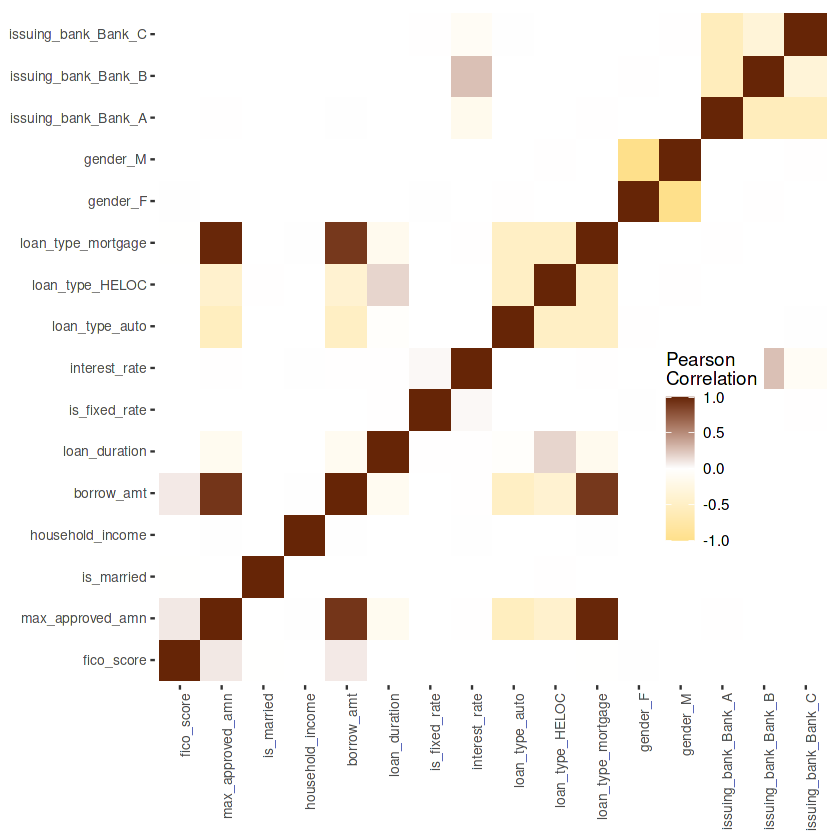

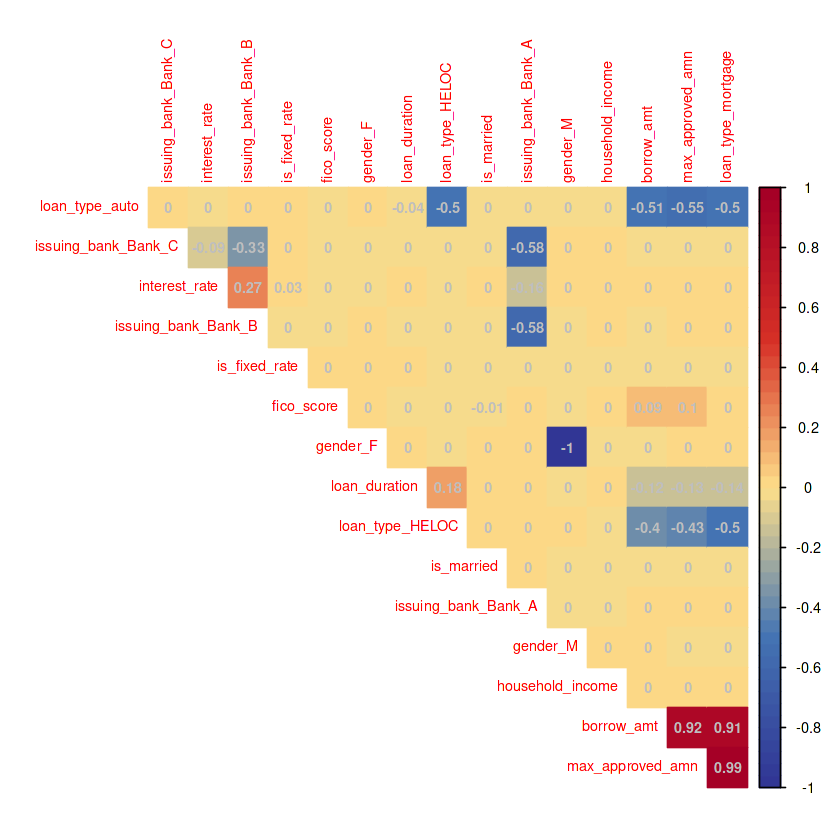

In [26]:
# Load libraries
library(ggplot2)
library(corrplot)
library(reshape2)

# Compute the correlation matrix
cor_matrix <- cor(converted_loan_data)
cor_matrix

# Create the correlation plot with ggplot2
ggplot(data = melt(cor_matrix), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#FEE08B", mid = "white", high = "#662506", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme(axis.text.x = element_text(angle = 90, vjust = 1, 
                                   size = 8, hjust = 1),
        axis.text.y = element_text(size = 8),
        axis.title = element_blank(),
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        axis.line = element_blank(),
        legend.justification = c(1, 0),
        legend.position = c(0.9, 0.2),
        legend.direction = "vertical") +
  coord_equal()

# Create the correlation plot with corrplot
corrplot(cor_matrix, method = "color", col = colorRampPalette(c("#313695", "#4575B4", "#FEE08B", "#D73027", "#A50026"))(50), 
         type = "upper", order = "hclust", addCoef.col = "grey", number.cex = 0.7, tl.cex = 0.7, cl.cex = 0.7, diag = FALSE)

In [27]:
library(dplyr)

correlation <- function(df) {
    
    # create a dataframe of correlations with interest_rate
    cor_df <- cor(df)[,"interest_rate"] %>% 
        abs() %>%
        sort(decreasing = TRUE) %>%
        as.data.frame()

    # rename the correlation column
    names(cor_df)[1] <- "correlation"


    return(cor_df)
    
}

correlation(converted_loan_data)

,correlation
,<dbl>
interest_rate,1.0000000000
issuing_bank_Bank_B,0.2689688571
issuing_bank_Bank_A,0.1563611488
issuing_bank_Bank_C,0.0888928511
is_fixed_rate,0.0306440327
household_income,0.0048271319
loan_type_mortgage,0.0036601866
max_approved_amn,0.0032235645
loan_duration,0.0029545555


In [28]:
normalized_features <- converted_loan_data %>%
    select(-interest_rate) %>%
    scale() %>%
    as.data.frame()


In [29]:
normalized_features

fico_score,max_approved_amn,is_married,household_income,borrow_amt,loan_duration,is_fixed_rate,loan_type_auto,loan_type_HELOC,loan_type_mortgage,gender_F,gender_M,issuing_bank_Bank_A,issuing_bank_Bank_B,issuing_bank_Bank_C
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.71960752,-0.7905225,0.6519161,-0.18764575,-0.6821352,1.9064434,0.3349669,1.4050812,-0.7070024,-0.7026234,0.9072867,-0.9072867,-1.0019611,1.7285951,-0.5746861
-1.27215438,-0.8009921,-1.5339327,-0.15435654,-0.7567656,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,-1.1021823,1.1021823,-1.0019611,1.7285951,-0.5746861
0.21972214,-0.7727242,0.6519161,-0.23008775,-0.8050754,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,0.9072867,-0.9072867,-1.0019611,1.7285951,-0.5746861
1.28337484,1.7096124,0.6519161,-0.23833498,2.1418261,-0.1576236,-2.9853562,-0.7116994,-0.7070024,1.4232309,-1.1021823,1.1021823,0.9980382,-0.5785018,-0.5746861
0.85515102,1.6081884,0.6519161,-0.23147826,2.3840418,-1.0864537,0.3349669,-0.7116994,-0.7070024,1.4232309,0.9072867,-0.9072867,0.9980382,-0.5785018,-0.5746861
-0.84393057,1.2057640,-1.5339327,-0.24172361,1.8759553,-0.1576236,0.3349669,-0.7116994,-0.7070024,1.4232309,0.9072867,-0.9072867,0.9980382,-0.5785018,-0.5746861
0.70320064,-0.7635634,-1.5339327,-0.22748085,-0.7184508,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,-1.1021823,1.1021823,-1.0019611,-0.5785018,1.7400723
1.13142445,-0.5706287,0.6519161,-0.23742122,-0.3976067,-0.1576236,0.3349669,-0.7116994,1.4144159,-0.7026234,0.9072867,-0.9072867,0.9980382,-0.5785018,-0.5746861
0.42692721,-0.5956575,0.6519161,-0.24680305,-0.4699049,-0.1576236,0.3349669,-0.7116994,1.4144159,-0.7026234,-1.1021823,1.1021823,-1.0019611,-0.5785018,1.7400723


# Modeling

Warning message:
“Use of `normalized_features$fico_score` is discouraged.
ℹ Use `fico_score` instead.”
Warning message:
“Use of `normalized_features$household_income` is discouraged.
ℹ Use `household_income` instead.”


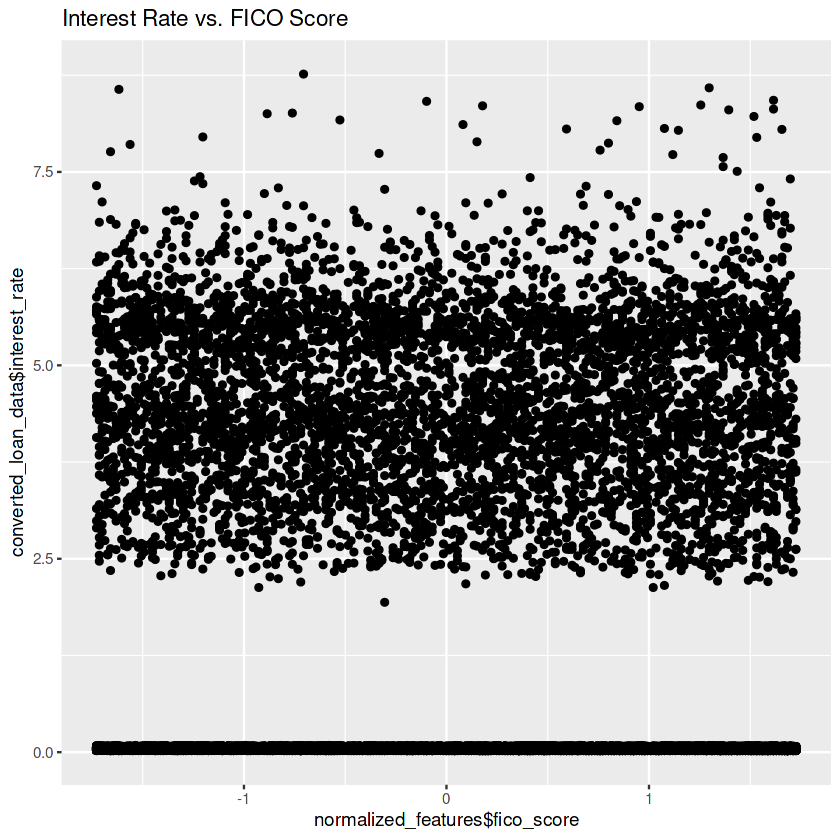

Warning message:
“Use of `normalized_features$issuing_bank_Bank_B` is discouraged.
ℹ Use `issuing_bank_Bank_B` instead.”


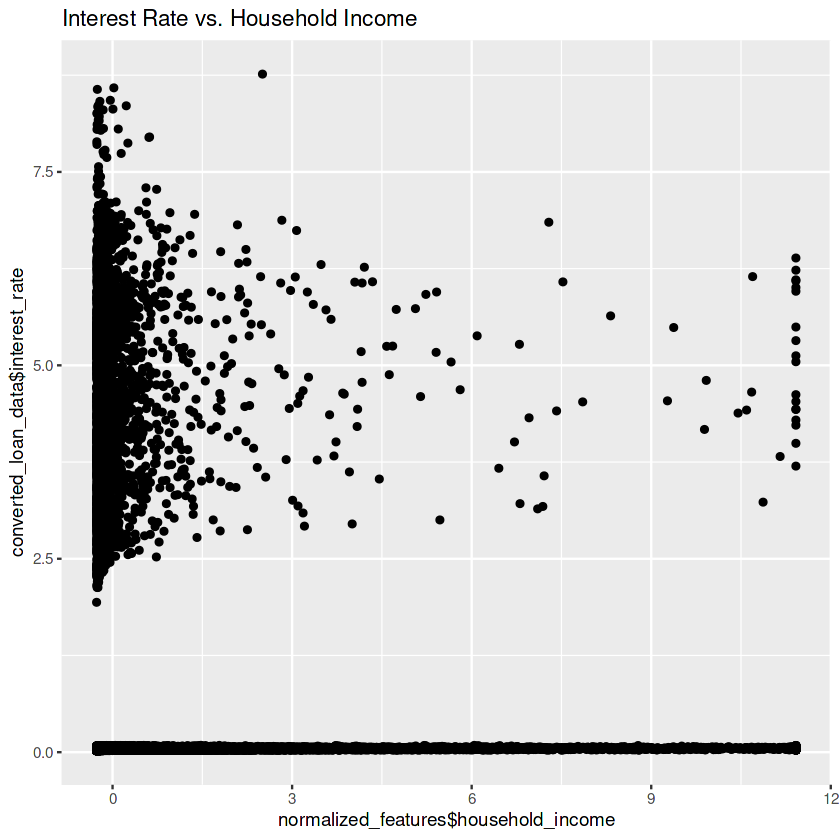

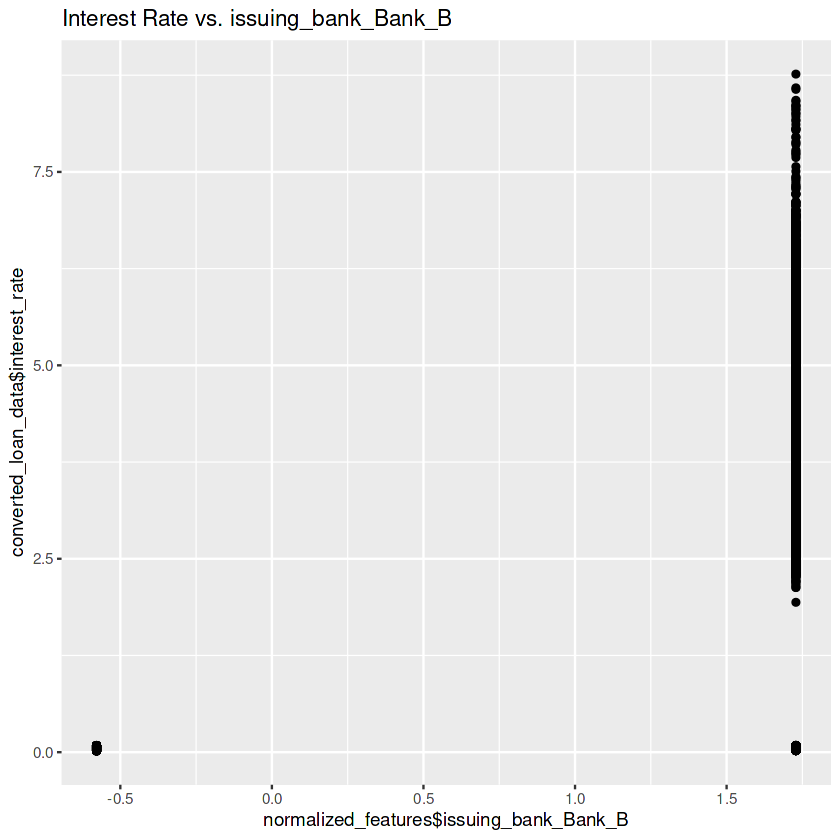

In [30]:
library(ggplot2)

# Create scatter plots
ggplot(normalized_features, aes(x = normalized_features$fico_score, y = converted_loan_data$interest_rate)) +
  geom_point() +
  labs(title = "Interest Rate vs. FICO Score")

ggplot(normalized_features, aes(x = normalized_features$household_income, y = converted_loan_data$interest_rate)) +
  geom_point() +
  labs(title = "Interest Rate vs. Household Income")

ggplot(normalized_features, aes(x = normalized_features$issuing_bank_Bank_B, y = converted_loan_data$interest_rate)) +
  geom_point() +
  labs(title = "Interest Rate vs. issuing_bank_Bank_B")

Our data seems to have non-linear relationhip to the target variable. Therefore, we will build some models that can work with non-linear data.

In [31]:
# Load the required packages
library(caTools)
library(glmnet)
library(rpart)
library(randomForest)
library(e1071)
library(xgboost)
library(nnet)
library(broom)


# Extract features and target variable from unscaled data
X <- converted_loan_data[, -which(names(converted_loan_data) == "interest_rate")]
Y <- converted_loan_data$interest_rate

# Normalize the features
normalized_features <- scale(X) %>%
    as.data.frame()

# Split the data into training and testing sets
set.seed(123) # For reproducibility
split <- sample.split(Y, SplitRatio = 0.9)
X_train <- normalized_features[split, ]
X_test <- normalized_features[!split, ]
Y_train <- Y[split]
Y_test <- Y[!split]

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-6

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [32]:
head(X)

fico_score,max_approved_amn,is_married,household_income,borrow_amt,loan_duration,is_fixed_rate,loan_type_auto,loan_type_HELOC,loan_type_mortgage,gender_F,gender_M,issuing_bank_Bank_A,issuing_bank_Bank_B,issuing_bank_Bank_C
<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
673,67300,1,68607,61800,30,1,1,0,0,1,0,0,1,0
633,63300,0,97096,39400,5,1,1,0,0,0,1,0,1,0
741,74100,1,32285,24900,5,1,1,0,0,1,0,0,1,0
818,1022500,1,25227,909400,10,0,0,0,1,0,1,1,0,0
787,983750,1,31095,982100,1,1,0,0,1,1,0,1,0,0
664,830000,0,22327,829600,10,1,0,0,1,1,0,1,0,0


In [33]:
head(Y)

[1] 0.05758949 0.03131462 0.04238259 0.02425724 0.03619640 0.03963878

In [34]:
head(X_train)
head(Y_train)
head(X_test)
head(Y_test)

,fico_score,max_approved_amn,is_married,household_income,borrow_amt,loan_duration,is_fixed_rate,loan_type_auto,loan_type_HELOC,loan_type_mortgage,gender_F,gender_M,issuing_bank_Bank_A,issuing_bank_Bank_B,issuing_bank_Bank_C
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.7196075,-0.7905225,0.6519161,-0.1876457,-0.6821352,1.9064434,0.3349669,1.4050812,-0.7070024,-0.7026234,0.9072867,-0.9072867,-1.0019611,1.7285951,-0.5746861
2,-1.2721544,-0.8009921,-1.5339327,-0.1543565,-0.7567656,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,-1.1021823,1.1021823,-1.0019611,1.7285951,-0.5746861
3,0.2197221,-0.7727242,0.6519161,-0.2300878,-0.8050754,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,0.9072867,-0.9072867,-1.0019611,1.7285951,-0.5746861
4,1.2833748,1.7096124,0.6519161,-0.2383350,2.1418261,-0.1576236,-2.9853562,-0.7116994,-0.7070024,1.4232309,-1.1021823,1.1021823,0.9980382,-0.5785018,-0.5746861
6,-0.8439306,1.2057640,-1.5339327,-0.2417236,1.8759553,-0.1576236,0.3349669,-0.7116994,-0.7070024,1.4232309,0.9072867,-0.9072867,0.9980382,-0.5785018,-0.5746861
7,0.7032006,-0.7635634,-1.5339327,-0.2274808,-0.7184508,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,-1.1021823,1.1021823,-1.0019611,-0.5785018,1.7400723


[1] 0.05758949 0.03131462 0.04238259 0.02425724 0.03963878 0.05198626

,fico_score,max_approved_amn,is_married,household_income,borrow_amt,loan_duration,is_fixed_rate,loan_type_auto,loan_type_HELOC,loan_type_mortgage,gender_F,gender_M,issuing_bank_Bank_A,issuing_bank_Bank_B,issuing_bank_Bank_C
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0.8551510,1.6081884,0.6519161,-0.2314783,2.3840418,-1.0864537,0.3349669,-0.7116994,-0.7070024,1.4232309,0.9072867,-0.9072867,0.9980382,-0.5785018,-0.5746861
11,0.6065049,-0.7653955,0.6519161,-0.2567773,-0.7224489,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,0.9072867,-0.9072867,-1.0019611,-0.5785018,1.7400723
20,0.8965920,-0.7598990,-1.5339327,0.1459848,-0.7031250,1.9064434,0.3349669,1.4050812,-0.7070024,-0.7026234,-1.1021823,1.1021823,0.9980382,-0.5785018,-0.5746861
24,0.3992999,1.5002209,0.6519161,0.1446211,1.7696736,-0.1576236,0.3349669,-0.7116994,-0.7070024,1.4232309,0.9072867,-0.9072867,0.9980382,-0.5785018,-0.5746861
31,-1.7003782,1.0029160,0.6519161,-0.2238959,-0.2640050,-0.9832504,-2.9853562,-0.7116994,-0.7070024,1.4232309,-1.1021823,1.1021823,-1.0019611,1.7285951,-0.5746861
32,-0.7334212,-0.7907843,0.6519161,-0.2060390,-0.6774707,-0.6736403,0.3349669,1.4050812,-0.7070024,-0.7026234,-1.1021823,1.1021823,-1.0019611,-0.5785018,1.7400723


[1] 0.03619640 0.03918578 0.05528552 0.05728326 0.03259193 0.03056501

In [35]:
# # Load the required packages
# library(caTools)
# library(glmnet)
# library(rpart)
# library(randomForest)
# library(e1071)
# library(xgboost)
# library(nnet)


# # Extract features and target variable from unscaled data
# X <- converted_loan_data[, -which(names(converted_loan_data) == "interest_rate")]
# Y <- converted_loan_data$interest_rate

# # Normalize the features
# normalized_features <- scale(X) %>%
#     as.data.frame()

# # Split the data into training and testing sets
# set.seed(123) # For reproducibility
# split <- sample.split(Y, SplitRatio = 0.9)
# X_train <- normalized_features[split, ]
# X_test <- normalized_features[!split, ]
# Y_train <- Y[split]
# Y_test <- Y[!split]



# # Lasso Regression
# lasso_model <- cv.glmnet(as.matrix(X_train), as.matrix(Y_train), alpha = 1)
# lasso_pred <- predict(lasso_model, as.matrix(X_test))
# lasso_mse <- mean((lasso_pred - Y_test)^2)
# lasso_rmse <- sqrt(lasso_mse)
# lasso_rmse

# # Ridge Regression
# ridge_model <- cv.glmnet(as.matrix(X_train), as.matrix(Y_train), alpha = 0)
# ridge_pred <- predict(ridge_model, as.matrix(X_test))
# ridge_mse <- mean((ridge_pred - Y_test)^2)
# ridge_rmse <- sqrt(ridge_mse)

# # Decision Tree Regression
# dt_model <- rpart(interest_rate ~ ., data = train, method = "anova")
# dt_pred <- predict(dt_model, newdata = X_test)
# dt_mse <- mean((dt_pred - Y_test)^2)
# dt_rmse <- sqrt(dt_mse)

# # Random Forest Regression
# rf_model <- randomForest(interest_rate ~ ., data = train)
# rf_pred <- predict(rf_model, newdata = X_test)
# rf_mse <- mean((rf_pred - Y_test)^2)
# rf_rmse <- sqrt(rf_mse)

# # Support Vector Regression
# svm_model <- svm(interest_rate ~ ., data = train, kernel = "linear")
# svm_pred <- predict(svm_model, newdata = X_test)
# svm_mse <- mean((svm_pred - Y_test)^2)
# svm_rmse <- sqrt(svm_mse)

# # XGBoost Regression
# xgb_train <- xgb.DMatrix(data = as.matrix(X_train), label = as.matrix(Y_train))
# xgb_test <- xgb.DMatrix(data = as.matrix(X_test), label = as.matrix(Y_test))
# xgb_params <- list(objective = "reg:squarederror", eval_metric = "rmse")
# xgb_model <- xgb.train(data = xgb_train, params = xgb_params, nrounds = 100)
# xgb_pred <- predict(xgb_model, as.matrix(X_test))
# xgb_mse <- mean((xgb_pred - Y_test)^2)
# xgb_rmse <- sqrt(xgb_mse)

# # Neural Network Regression
# nn_model <- nnet(interest_rate ~ ., data = train, size = 5)
# nn_pred <- predict(nn_model, newdata = X_test)
# nn_mse <- mean((nn_pred - Y_test)^2)
# nn_rmse <- sqrt(nn_mse)

# # Create a table of RMSE values for each model
# models <- c("Lasso", "Ridge", "Decision Tree", "Random Forest", "SVM", "XGBoost", "Neural Network")
# rmse <- c(lasso_rmse, ridge_rmse, dt_rmse, rf_rmse, svm_rmse, xgb_rmse, nn_rmse)
# results_df <- data.frame(models, rmse)

In [36]:
# Lasso Regression

library(glmnet)

cv.lasso <- cv.glmnet(as.matrix(X_train), as.matrix(Y_train), alpha = 1, nfolds = 10)
cv.lasso

best_lambda_lasso <- cv.lasso$lambda.min
lasso_model <- glmnet(as.matrix(X_train), as.matrix(Y_train), alpha = 1, lambda = best_lambda_lasso)
lasso_model

# Making predictions on test data
lasso_prediction <- predict(lasso_model, as.matrix(X_test))
lasso_mse <- mean((lasso_prediction - Y_test)^2)
lasso_mse
# lasso_r2 <- summary(lasso_model)$r.squared
# lasso_adjr2 <- 1 - (1 - r2_lasso) * ((nrow(X_test) - 1)/(nrow(X_test) - ncol(X_test) - 1))
# lasso_mae <- mean(abs(lasso_pred - Y_test))



Call:  cv.glmnet(x = as.matrix(X_train), y = as.matrix(Y_train), nfolds = 10,      alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.00061    63  0.4895 0.006788      10
1se 0.07713    11  0.4959 0.007245       1


Call:  glmnet(x = as.matrix(X_train), y = as.matrix(Y_train), alpha = 1,      lambda = best_lambda_lasso) 

  Df %Dev    Lambda
1 12 7.34 0.0006112

[1] 0.462289

In [37]:
# Ridge Regression

cv.ridge <- cv.glmnet(as.matrix(X_train), as.matrix(Y_train), alpha = 0, nfolds = 10)
cv.ridge

best_lambda_ridge <- cv.ridge$lambda.min
ridge_model <- glmnet(as.matrix(X_train), as.matrix(Y_train), alpha = 0, lambda = best_lambda_ridge)
ridge_model

# Making predictions on test data
ridge_prediction <- predict(ridge_model, as.matrix(X_test))
ridge_mse <- mean((ridge_prediction - Y_test)^2)
ridge_mse
# ridge_rmse <- sqrt(ridge_mse)
# ridge_rmse
# ridge_aic <- AIC(ridge_model)
# ridge_bic <- BIC(ridge_model)
# ridge_adjr2 <- summary(ridge_model)$adj.r.squared
# ridge_r2 <- summary(ridge_model)$r.squared
# ridge_mae <- mean(abs(ridge_pred - Y_test))


Call:  cv.glmnet(x = as.matrix(X_train), y = as.matrix(Y_train), nfolds = 10,      alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min 0.0196   100  0.4895 0.006411      15
1se 0.6708    62  0.4955 0.006841      15


Call:  glmnet(x = as.matrix(X_train), y = as.matrix(Y_train), alpha = 0,      lambda = best_lambda_ridge) 

  Df %Dev  Lambda
1 15 7.34 0.01955

[1] 0.4622542

In [38]:
# Decision Tree Regression

library(rpart)

dt_model <- rpart(Y_train ~ ., data = X_train, method = "anova")
dt_model
dt_pred <- predict(dt_model, newdata = X_test)
dt_pred
dt_mse <- mean((dt_pred - Y_test)^2)
dt_mse
# dt_rmse <- sqrt(dt_mse)
# dt_rmse

n= 195007 

node), split, n, deviance, yval
      * denotes terminal node

1) root 195007 103005.40000 0.15710200  
  2) issuing_bank_Bank_B< 0.5750466 146059     19.03777 0.04390329 *
  3) issuing_bank_Bank_B>=0.5750466 48948  95530.03000 0.49488280 *

5         11         20         24         31         32         87 
0.04390329 0.04390329 0.04390329 0.04390329 0.49488276 0.04390329 0.04390329 
       104        107        111        114        118        126        139 
0.04390329 0.49488276 0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 
       189        190        193        195        202        220        222 
0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 0.49488276 0.49488276 
       230        248        249        261        264        277        297 
0.04390329 0.49488276 0.04390329 0.04390329 0.49488276 0.04390329 0.04390329 
       327        330        340        347        352        356        376 
0.49488276 0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 
       380        386        391        400        401        403        417 
0.49488276 0.04390329 0.04390329 0.04390329 0.49488276 0.04390329 0.04390329 
       431        434        461        485        491        496        509 
0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 0.49488276 0.04390329 
       527        529        531        546        562        572        575 
0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 0.49488276 0.04390329 
       589        593        614        619        621        637        652 
0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 0.49488276 0.04390329 
       657        667        685        719        734        738        741 
0.04390329 0.04390329 0.49488276 0.04390329 0.04390329 0.49488276 0.49488276 
       750        771        790        791        806        824        841 
0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 
       853        857        882        886        901        908        916 
0.04390329 0.04390329 0.49488276 0.49488276 0.49488276 0.04390329 0.49488276 
       935        941        953        956        965        977        983 
0.04390329 0.04390329 0.04390329 0.49488276 0.49488276 0.04390329 0.04390329 
       985       1050       1069       1097       1108       1109       1118 
0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 
      1127       1144       1151       1154       1170       1174       1199 
0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 0.49488276 0.04390329 
      1206       1212       1220       1225       1239       1259       1268 
0.04390329 0.49488276 0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 
      1270       1323       1325       1346       1378       1391       1408 
0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 0.49488276 
      1410       1412       1424       1428       1429       1461       1467 
0.04390329 0.49488276 0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 
      1478       1485       1493       1497       1501       1502       1512 
0.04390329 0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 
      1539       1550       1551       1560       1614       1615       1644 
0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 
      1646       1667       1683       1690       1697       1704       1709 
0.49488276 0.04390329 0.04390329 0.49488276 0.04390329 0.49488276 0.49488276 
      1716       1719       1731       1734       1739       1742       1749 
0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 0.04390329 
      1751       1755       1760       1766       1770       1787       1798 
0.49488276 0.04390329 0.04390329 0.04390329 0.49488276 0.49488276 0.49488276 
      1807       1821       1833       1839       1851       1857       1860 
0.04390329 0.04390329 0.49488276 0.04390329 0.04390329 0.04390329 0.04390329 
      1876       1879       1892       1895       1923       1930       1961 
0.04390329 0.04390329 0.04390329 0.04390329 0.49488276 0.04390329 0.49488276 
      1969       1979       2015       2021       2023       2038       2039 
0.49488276 0.04390329 0.0439032

[1] 0.4626775

In [39]:
# Neural Network Regression
library(nnet)

nn_model <- nnet(Y_train ~ ., data = X_train, size = 5)
nn_model
nn_pred <- predict(nn_model, newdata = X_test)
nn_pred
nn_mse <- mean((nn_pred - Y_test)^2)
nn_mse
# nn_rmse <- sqrt(nn_mse)
# nn_rmse

# weights:  86
initial  value 122201.187200 
final  value 107818.403599 
converged


a 15-5-1 network with 86 weights
inputs: fico_score max_approved_amn is_married household_income borrow_amt loan_duration is_fixed_rate loan_type_auto loan_type_HELOC loan_type_mortgage gender_F gender_M issuing_bank_Bank_A issuing_bank_Bank_B issuing_bank_Bank_C 
output(s): Y_train 
options were -

5,0
11,0
20,0
24,0
31,0
32,0
87,0
104,0
107,0
111,0
114,0


[1] 0.5218713

In [40]:
mse <- c(lasso_mse, ridge_mse, dt_mse, nn_mse)
Models <- c("Lasso", "Ridge", "Decision Tree", "Neural Network")

results_df <- data.frame(Models, mse)
results_df

Models,mse
<chr>,<dbl>
Lasso,0.4622890
Ridge,0.4622542
Decision Tree,0.4626775
Neural Network,0.5218713


# Result and Analysis

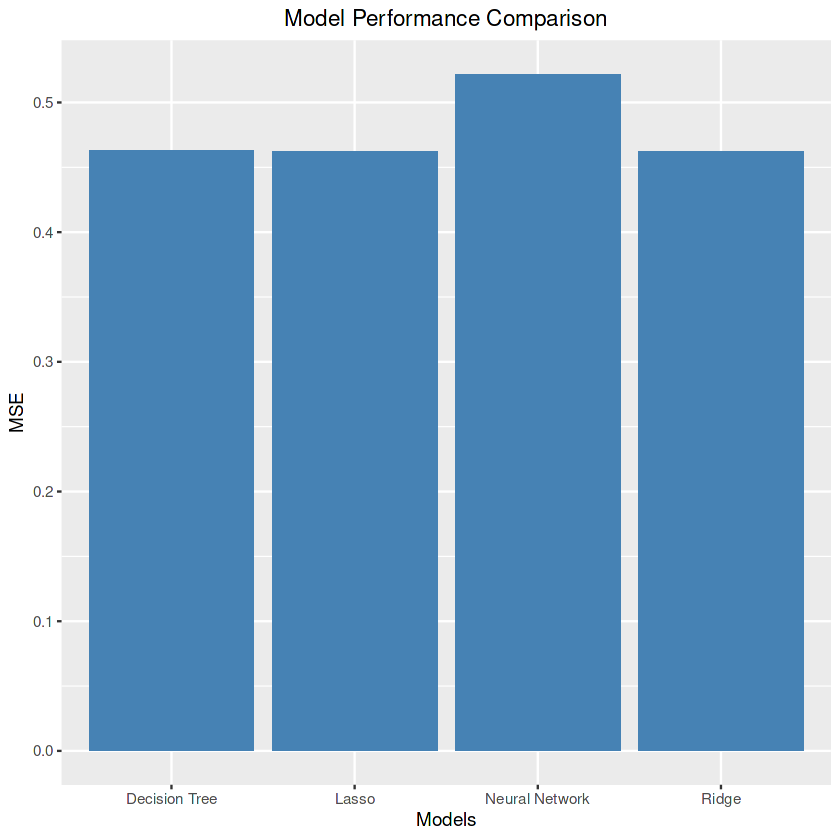

In [41]:
library(ggplot2)

ggplot(results_df, aes(x = Models, y = mse)) + 
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Model Performance Comparison",
       x = "Models", y = "MSE") +
  theme(plot.title = element_text(hjust = 0.5))